In [190]:
%reset

In [191]:
import xclim as xc
import xarray as xr

In [192]:
#import packages

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from datetime import datetime

In [193]:
import os
ROOT_DIR = os.path.abspath(os.curdir)

In [194]:

#import hydroplotting as hp


In [195]:
#import sys
#this is to reload the work in progress modules that are not in the current directory
#import importlib
#importlib.reload(hydroplotting)
#import hydroplotting

In [196]:
#load and plot SNOTEL data
from hydroplotting import funcutils as fc
path_Skookum = ROOT_DIR + '/Data/Raw/bcqc_47.68000_-121.61000._Skookum_Creek.txt'
path_Alpine = ROOT_DIR + '/Data/Raw/bcqc_47.78000_-121.70000_Alpine_Meadows.txt'

In [197]:
#create dataframes for SNOTEL stations
snotel_Skookum = fc.snotel_data(path_Skookum)
snotel_Alpine = fc.snotel_data(path_Alpine)

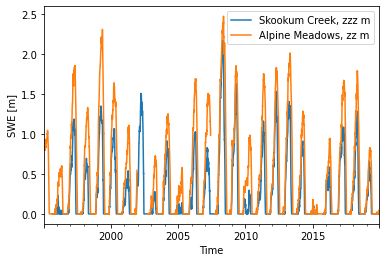

In [198]:
#plot SNOTELS:
ax = snotel_Skookum.plot(kind='line',  y = 'SWE_m', label = 'Skookum Creek, zzz m')
snotel_Alpine.plot(kind='line', y = 'SWE_m', label = 'Alpine Meadows, zz m', ax = ax)
ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [m]')

plt.show()

In [199]:
skook_ds = snotel_Skookum.to_xarray()
alpine_ds = snotel_Alpine.to_xarray()

In [200]:
snotel_Skookum.columns

Index(['year', 'month', 'day', 'daily_P_in', 'Tmax_F', 'Tmin_F', 'Tmean_F',
       'SWE_in', 'Tmean_C', 'SWE_m', 'datetime', 'water_year'],
      dtype='object')

In [205]:
#test = skook_ds['daily_P_in'].resample(index = "1y").cumsum(dim = "index")
test = skook_ds['daily_P_in'].cumsum(dim = "index").resample(index = "1y")
test
#test1 = skook_ds['daily_P_in'].groupby(pd.Grouper(freq='Y')).cumsum(dim = "index").resample('Q').last()
#test1

DataArrayResample, grouped over '__resample_dim__'
27 groups with labels 1995-12-31, ..., 2021-12-31.

In [206]:
path_snotel_skooK_P_SPU = ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.txt'
#skooK_P_SPU = pd.read_csv(ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.csv')

In [207]:
#def spu_snotel_data(path_SPU):
#    parse_dates = ['DateTime']
#    snotel_obs = pd.read_csv(path_SPU,  sep='\s+', parse_dates=parse_dates)
#    snotel_obs = snotel_obs.set_index(snotel_obs['DateTime'])
#    calc_water_year_apply_SPU(snotel_obs)
#    return snotel_obs

<AxesSubplot:xlabel='time'>

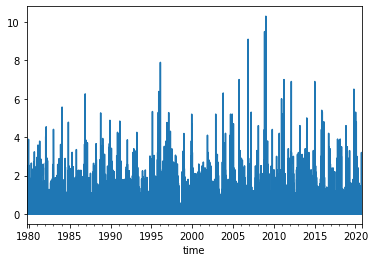

In [208]:

snotel_obs_SPU = fc.spu_snotel_data(path_snotel_skooK_P_SPU)
snotel_obs_SPU.index.names = ['time']
snotel_obs_SPU.Total.plot()


In [ ]:
def spu_snotel_data_xr(SPU_data_frame):
    snotel_obs_SPU = SPU_data_frame.to_xarray()
    snotel_obs_SPU['Max'].attrs = {"units": mm/d, '_FillValue': -999}
    snotel_obs_SPU['Min'].attrs = {"units": mm/d, '_FillValue': -999}
    snotel_obs_Total['Max'].attrs = {"units": mm/d, '_FillValue': -999}
    return snotel_obs



In [215]:
#get precip data in xclim format
snotel_obs_SPU = snotel_obs_SPU.to_xarray()
#add units for processing with xclim


AttributeError: 'Dataset' object has no attribute 'to_xarray'

In [ ]:
snotel_obs_SPU['Max'].attrs = {"units": mm/d, '_FillValue': -999}
snotel_obs_SPU['Min'].attrs = {"units": mm/d, '_FillValue': -999}
snotel_obs_Total['Max'].attrs = {"units": mm/d, '_FillValue': -999}

In [216]:

snotel_obs_SPU.Total.attrs['units'] = "mm/d"
snotel_obs_SPU.attrs['units'] = "mm/d"
snotel_obs_SPU

<xarray.Dataset>
Dimensions:     (time: 14977)
Coordinates:
  * time        (time) datetime64[ns] 1979-10-01 1979-10-02 ... 2020-10-01
Data variables:
    DateTime    (time) datetime64[ns] 1979-10-01 1979-10-02 ... 2020-10-01
    Max         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Min         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Avg         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Total       (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    water_year  (time) int64 1980 1980 1980 1980 1980 ... 2020 2020 2020 2021
Attributes:
    units:    mm/d

In [217]:
out1 = xc.atmos.precip_accumulation(snotel_obs_SPU.Total, freq="YS")

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


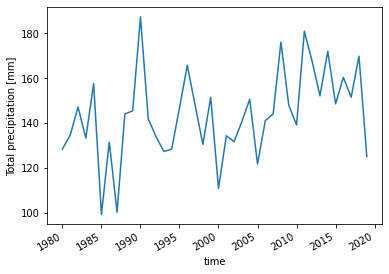

In [218]:
out1.plot()

In [45]:
#snotel_obs1.Total
#snotel_obs1.plot(x ='DateTime', y='Total', kind = 'line')
skook_ds.rename_dims({'datetime':'time'})
skook_ds

ValueError: cannot rename 'datetime' because it is not a dimension in this dataset

In [179]:
time_index = skook_ds.Tmean_C.index
time_index  = time_index.to_numpy()
type(time_index)

In [179]:
da = xr.DataArray(
    test,
    coords= [time_index],
    dims= 'time',
)
ds_temp = da.to_dataset()
ds_temp

In [153]:
out2 = xc.atmos.tx_days_above(dst, thresh="20 C", freq="MS")

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


In [154]:
out2

<xarray.DataArray 'tx_days_above' (time: 314, index: 9529)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
  * time     (time) datetime64[ns] 1995-08-01 1995-09-01 ... 2021-09-01
  * index    (index) datetime64[ns] 1995-08-30 1995-08-31 ... 2021-09-30
Attributes:
    units:          days
    cell_methods:    time: sum over days
    history:        [2022-07-23 10:10:51] tx_days_above: TX_DAYS_ABOVE(tasmax...
    standard_name:  number_of_days_with_air_temperature_above_threshold
    long_name:      Number of days with tmax > 20 c
    description:    Monthly number of days where daily maximum temperature ex...

In [179]:
time_index = np.array(time_index)
time_index

In [179]:
#temp = skook_ds.Tmean_C
#temp.index.name = 'time'
test.rename({'index':'time'})
test

In [179]:
skook_ds.index.name = 'time'
skook_ds.rename({'index':'time'})
skook_ds

In [179]:
#temp.to_dataset()
out2 = xc.atmos.tx_days_above(da, thresh="20 C", freq="MS")